#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
# Whether use gpu-based wave-optics simulation or not.
# With gpu=False, only ray-tracing calculation is performed. 
gpu = False

In [2]:
import sys

sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
from XRaySimulation import util, DeviceSimu, Pulse

# Level 1: simulate the XPP and the X-ray
import Controller

if gpu:
    import gpuWaveOptics

# Level 2: Develop the auto-alignment algorithm which control either the simulator or XPP controller through the parser.
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController_TG()

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=9.8,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, ro

### Define functions on the fly

In [4]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)

def move_delay(val):
    _ = x.t45.delay_umvr(val)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)

def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment(gpu_flag=gpu):
    pass

def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [5]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89071 degree
Motor moved from -17.88927 to -17.89071 degree


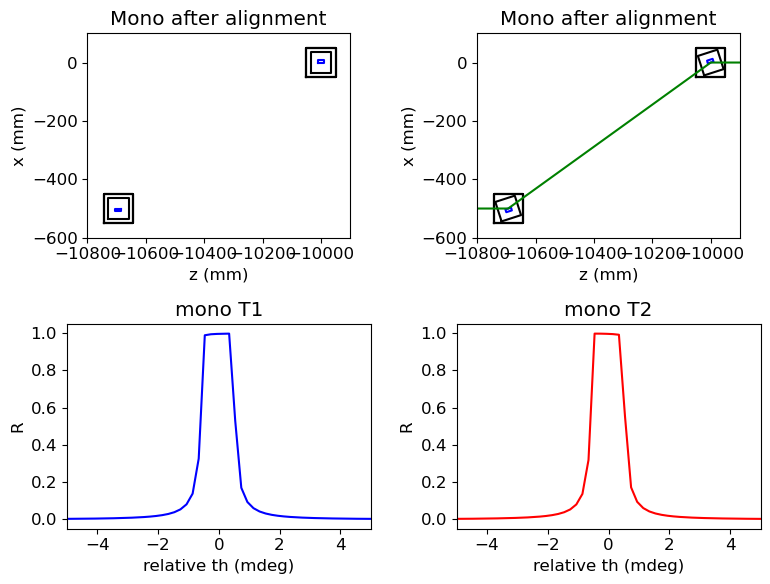

In [6]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0])

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 19.23525 to 19.23614 degree
Motor moved from 19.23525 to 19.23614 degree
Motor moved from 19.23525 to 19.23584 degree
Motor moved from 19.23525 to 19.23700 degree
Motor moved from 19.23525 to 19.23724 degree
Motor moved from 19.23525 to 19.23593 degree


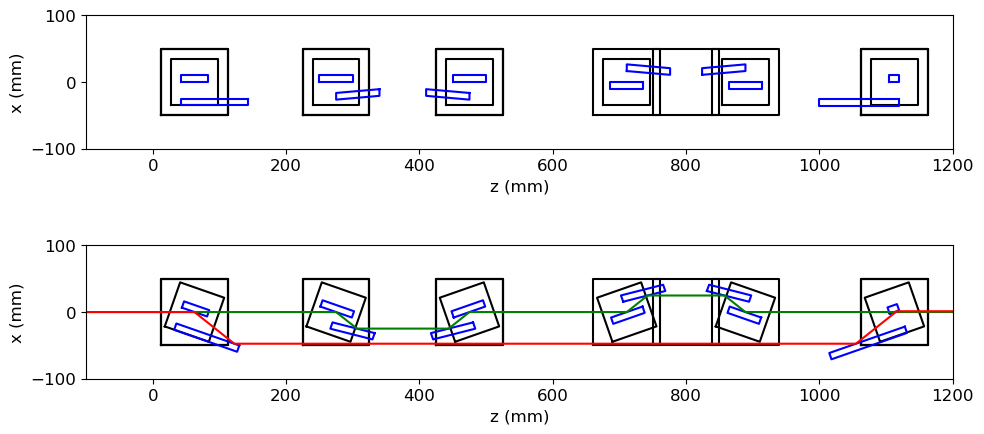

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Get the most updated rocking curve around current location.


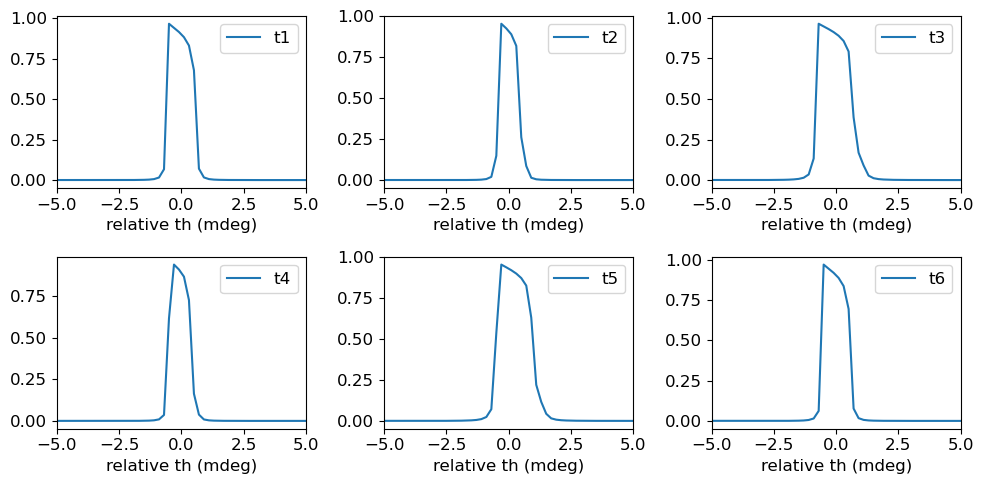

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

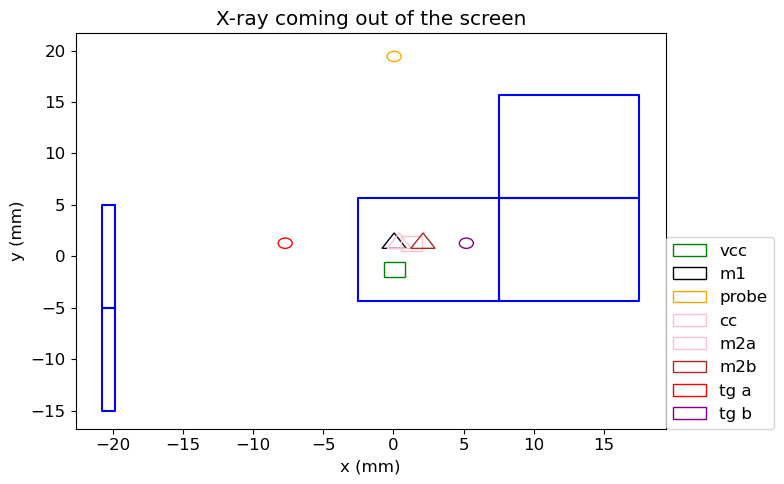

In [9]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

x.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [10]:
# Assume that we have calibrated the incident angle
_ = x.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = x.get_raytracing_trajectory(path="probe m1 only")
_ = x.m1.y_umvr(100)
path_new = x.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = x.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = x.m1.y_umvr(total_diff / coef * 100)

Motor moved from 0.00000 to 0.10000 degree
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse -53730.14569 um in y axis by moving m1y 100 um
Need to move m1y -850.58012 um to compensate the total difference of 457017.93675 um
Motor moved from 100.0000 um to to -750.5801 um


Perform ray tracing calculation at current motor position.


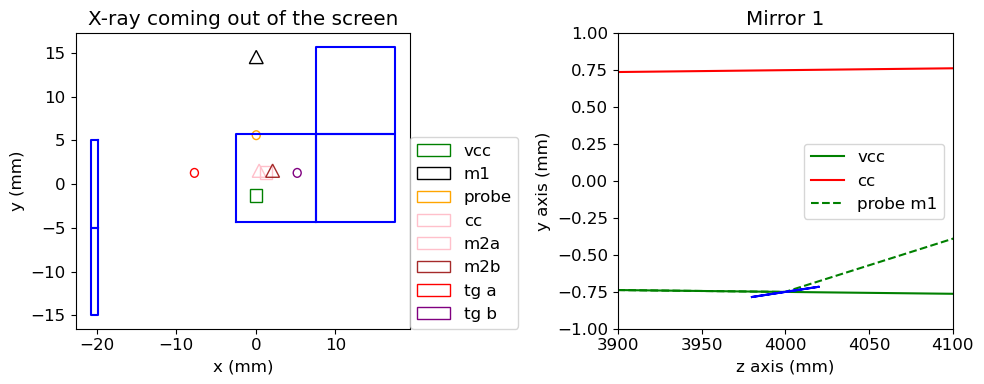

In [11]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

### Align Bragg angle

In [12]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / x.gaussian_pulse.klen0, plane_distance=Controller.si111['d'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = x.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = DeviceSimu.get_rocking_curve_around_axis(
    kin=x.gaussian_pulse.k0,
    scan_range=np.deg2rad(0.5),
    scan_number=10 ** 4,
    rotation_axis=x.si.pi.rotation_axis,
    h_initial=x.si.optics.h,
    normal_initial=x.si.optics.normal,
    thickness=x.si.optics.thickness,
    chi_dict=x.si.optics.chi_dict, )

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = x.si.pi_umv(target=x.si.pi.control_location + angle_adjust)

Motor moved from 0.00000 to 1.63904 degree
Motor moved from 1.63904 to 1.64180 degree


### Align silicon position and overlap

In [13]:
# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = x.get_raytracing_trajectory(path="probe")
_ = x.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = x.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = x.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                          total_diff))
_ = x.si.y_umvr(total_diff / coef * 100)

Motor moved from 0.0000 um to to 100.0000 um
Move the probe pulse 209.06965 um in y axis by moving siy 100 um
Need to move siy -1362.84919 um to compensate the total difference of -2849.30398 um
Motor moved from 100.0000 um to to -1262.8492 um


Perform ray tracing calculation at current motor position.


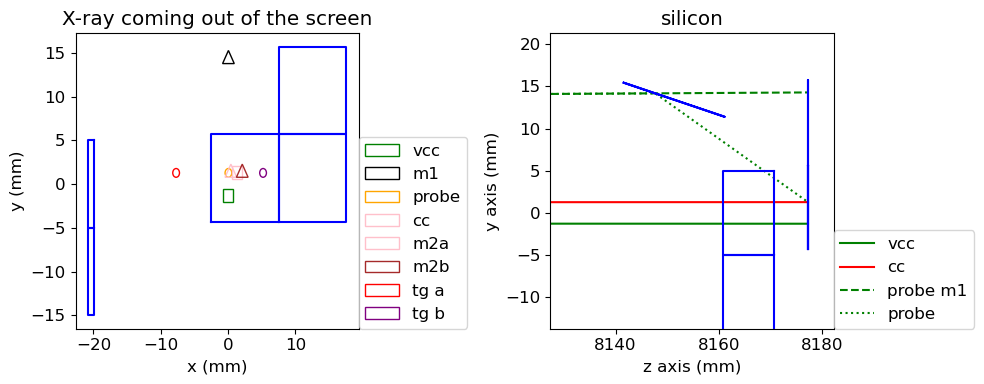

In [14]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [15]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_2 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_3 = x.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
The different between probe beam and cc on the yag is
[ 4.64827264e-01 -1.20943384e+03  9.31322575e-10]
Motor moved from 0.0000 um to to 100.0000 um
Motor moved from 0.0000 um to to -100.0000 um
The different between probe beam and cc on the yag is
[ 4.67403220e-01 -1.07559858e+03  9.31322575e-10]
The relative beam positions between the probe and cc beam changes
[2.57595569e-03 1.33835263e+02 0.00000000e+00]
by changing the t2x and t3x by 100 um
The current total difference is [-4.67403220e-01  1.07559858e+03 -9.31322575e-10]
Needs to move 803.6735319178702um to elimiate the horizontal difference
Motor moved from 100.0000 um to to 903.6735 um
Motor moved from -100.0000 um to to -903.6735 um
After adjusting, the different between probe beam and cc on the yag is
[-4.88149364e-01  7.11688595e-02 -9.31322575e-10]


# Step 3: Align the total reflection mirrors for the pump pulse for 5nm

In [16]:
move_yag()

_ = x.m2a.yaw_umv(np.deg2rad(0.35))
_ = x.m2b.yaw_umv(np.deg2rad(0.35))

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Motor moved from 0.00000 to 0.35000 degree
Motor moved from 0.00000 to 0.35000 degree
The TG period along each dimension in nm: 5.123890826015288


In [17]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 199.42493 um in x axis by moving m2a_x 100 um
Need to move m2a_x 3577.39868 um to compensate the total difference of 7134.22473 um
Motor moved from 100.0000 um to to 3677.3987 um

 
Get trajectory b
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 200.57028 um in x axis by moving m2a_x 100 um
Need to move m2a_x -1243.59435 um to compensate the total difference of -2494.28066 um
Motor moved from 100.0000 um to to -1143.5944 um


Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


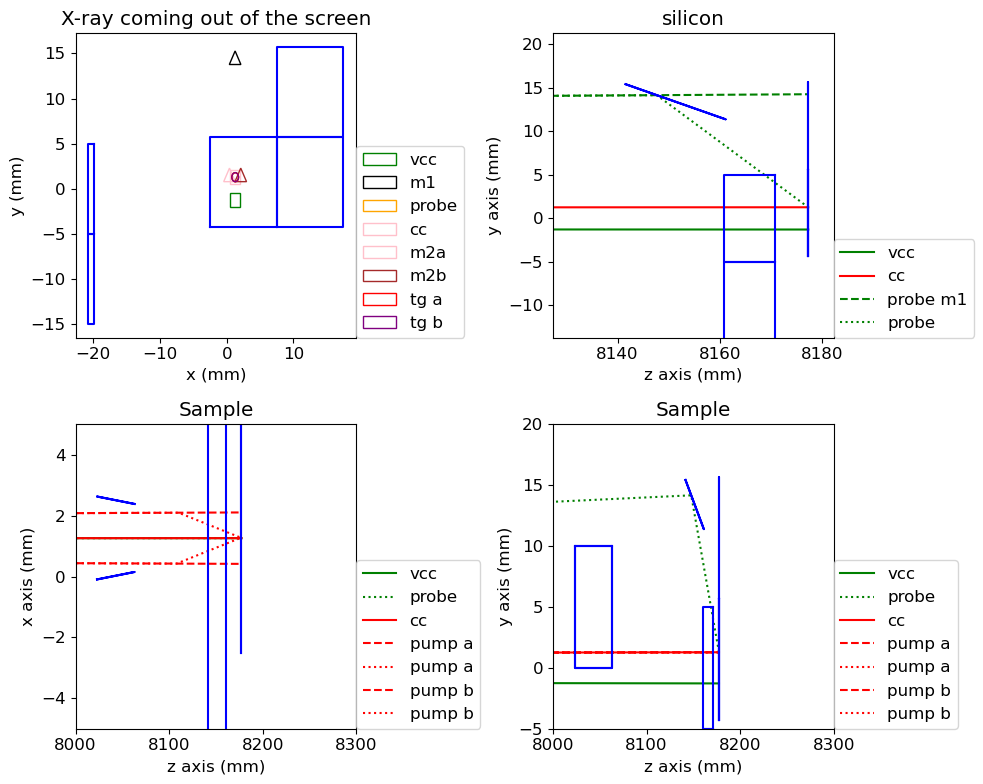

In [18]:
move_yag()

# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[8000, 8300],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[8000, 8300])

plt.tight_layout()
plt.show()

### Align the miniSD location for time 0

Motor moved from 0.0000 um to to -6000.0000 um
Motor moved from 903.6735 um to to 3925.6042 um
Motor moved from -903.6735 um to to 2094.3958 um
0.5604257214966941
-106.3992306679635


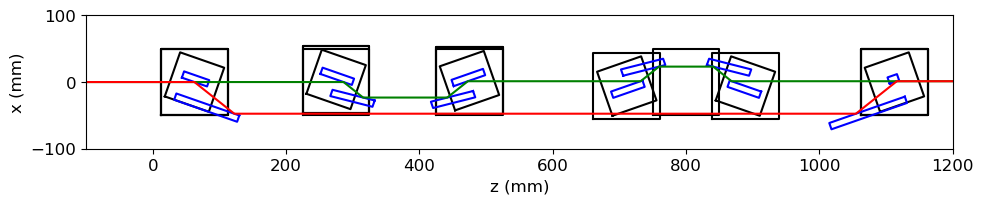

In [19]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.5604257214966941
-11307.35563478541


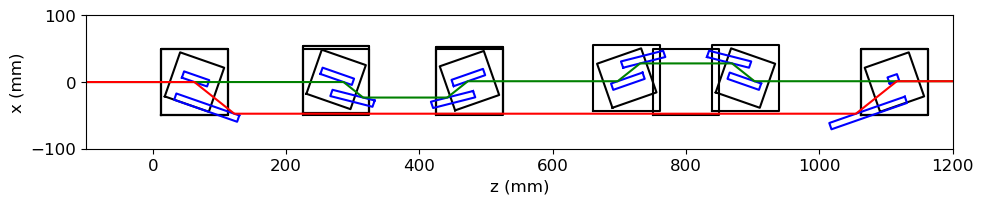

In [20]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 7nm

In [72]:
_ = x.m2a.yaw_umv(np.deg2rad(0.25))
_ = x.m2b.yaw_umv(np.deg2rad(0.25))
x.m2a.z_umv(49e3)
x.m2b.z_umv(49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Motor moved from 0.25000 to 0.25000 degree
Motor moved from 0.25000 to 0.25000 degree
Motor moved from 45000.0000 um to to 49000.0000 um
Motor moved from 45000.0000 um to to 49000.0000 um
The TG period along each dimension in nm: 7.139471362923243


In [73]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 4046.4995 um to to 4146.4995 um
Move the TG-a pulse 200.22169 um in x axis by moving m2a_x 100 um
Need to move m2a_x -82.71030 um to compensate the total difference of -165.60397 um
Motor moved from 4146.4995 um to to 4063.7892 um

 
Get trajectory b
Motor moved from -1527.6214 um to to -1427.6214 um
Move the TG-a pulse 200.29961 um in x axis by moving m2a_x 100 um
Need to move m2a_x -117.31849 um to compensate the total difference of -234.98848 um
Motor moved from -1427.6214 um to to -1544.9399 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


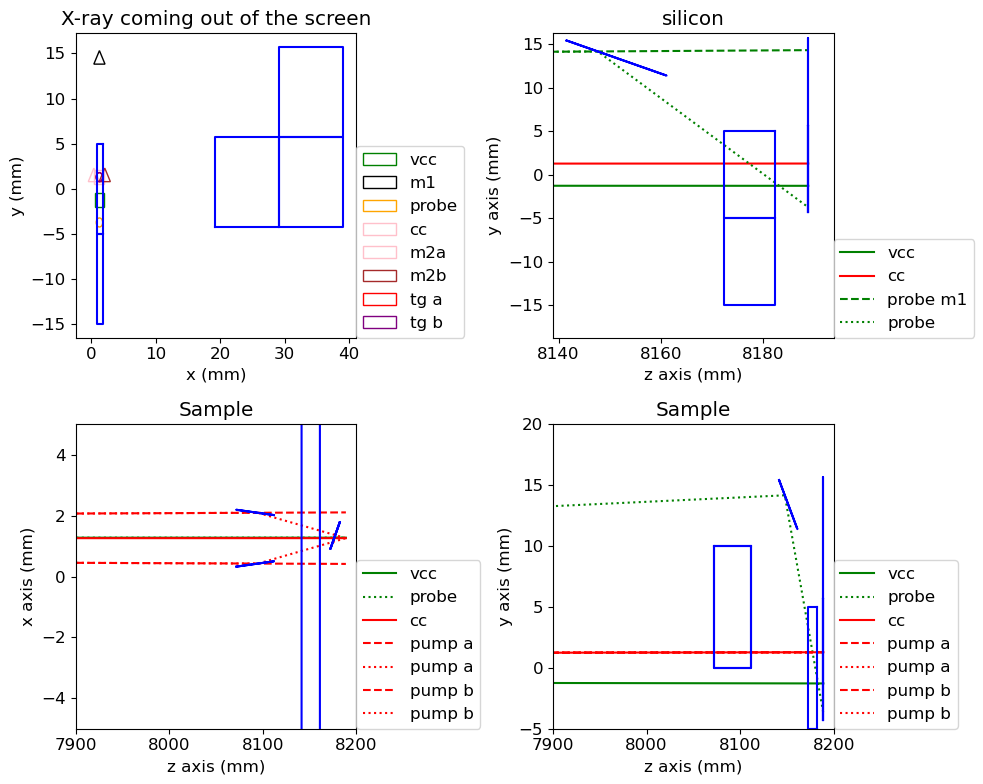

In [74]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

Motor moved from 6000.0000 um to to -6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.05715715783971002
-3595.7355891638526


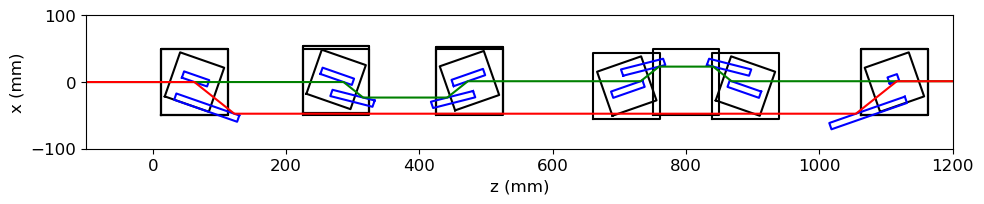

In [75]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.05715715783971002
-14796.386533512949


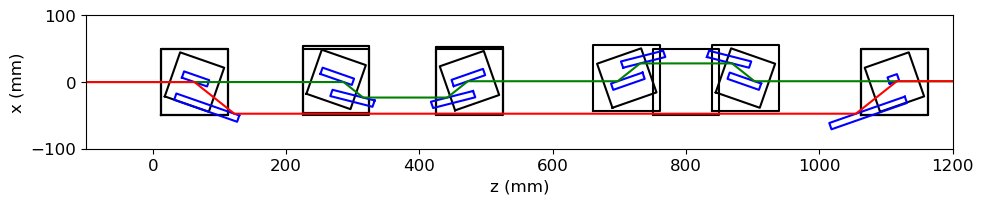

In [76]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 15nm

In [26]:
x.m2a.z.control_limits

array([-50000.,  50000.])

In [27]:
_ = x.m2a.yaw_umv(np.deg2rad(0.12))
_ = x.m2b.yaw_umv(np.deg2rad(0.12))
x.m2a.z_umv(-49e3)
x.m2b.z_umv(-49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Motor moved from 0.25000 to 0.12000 degree
Motor moved from 0.25000 to 0.12000 degree
Motor moved from -15000.0000 um to to -49000.0000 um
Motor moved from -15000.0000 um to to -49000.0000 um
The TG period along each dimension in nm: 14.65483952988945


In [28]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 3836.5886 um to to 3936.5886 um
Move the TG-a pulse 199.23372 um in x axis by moving m2a_x 100 um
Need to move m2a_x 167.74029 um to compensate the total difference of 334.19522 um
Motor moved from 3936.5886 um to to 4104.3289 um

 
Get trajectory b
Motor moved from -1316.3535 um to to -1216.3535 um
Move the TG-a pulse 200.33183 um in x axis by moving m2a_x 100 um
Need to move m2a_x -367.30490 um to compensate the total difference of -735.82861 um
Motor moved from -1216.3535 um to to -1583.6584 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


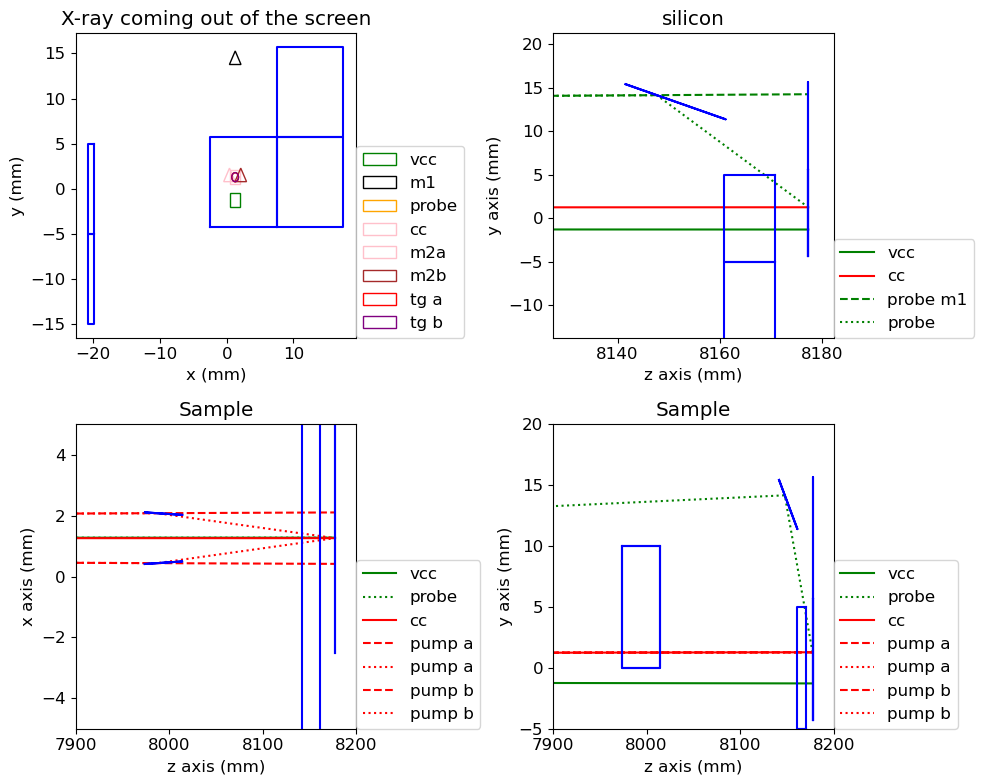

In [29]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

Motor moved from 6000.0000 um to to -6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.0238442470866556
-3601.6968118800587


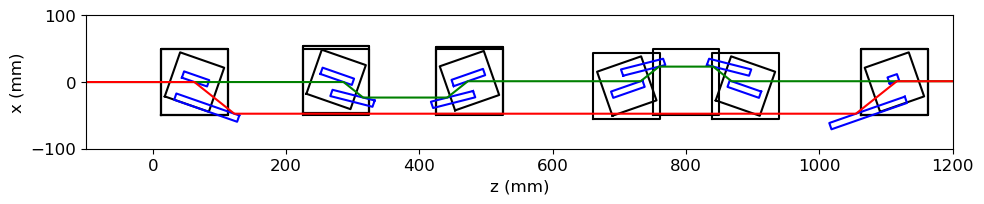

In [62]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.0238442470866556
-14801.944729324412


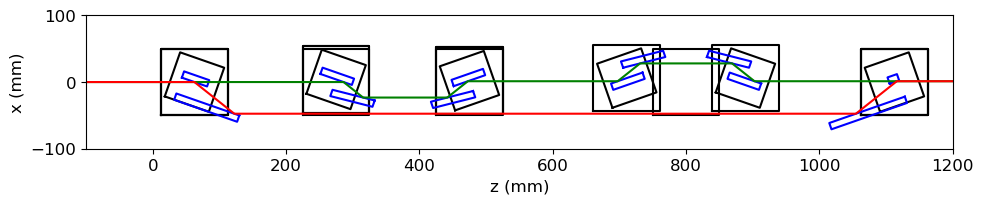

In [63]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 4: Find the X-ray beam on the sample YAG screen

In [30]:
# Step 1: Move the sample to the location of the YAG
move_sample()

Move sample tower to sample
Move sample.z
Motor moved from 0.0000 um to to 11565.5671 um
Move sample.x
Motor moved from 0.0000 um to to 22804.9636 um


# Step 5: Refine the spatial overlap

In [34]:
x.sample.x_umvr(-1)

Motor moved from 22804.9636 um to to 22803.9636 um


In [35]:
x.sample.x_umvr(-1)

Motor moved from 22803.9636 um to to 22802.9636 um


In [36]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([6065.3612113 ,   15.84461519,  181.10478036])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


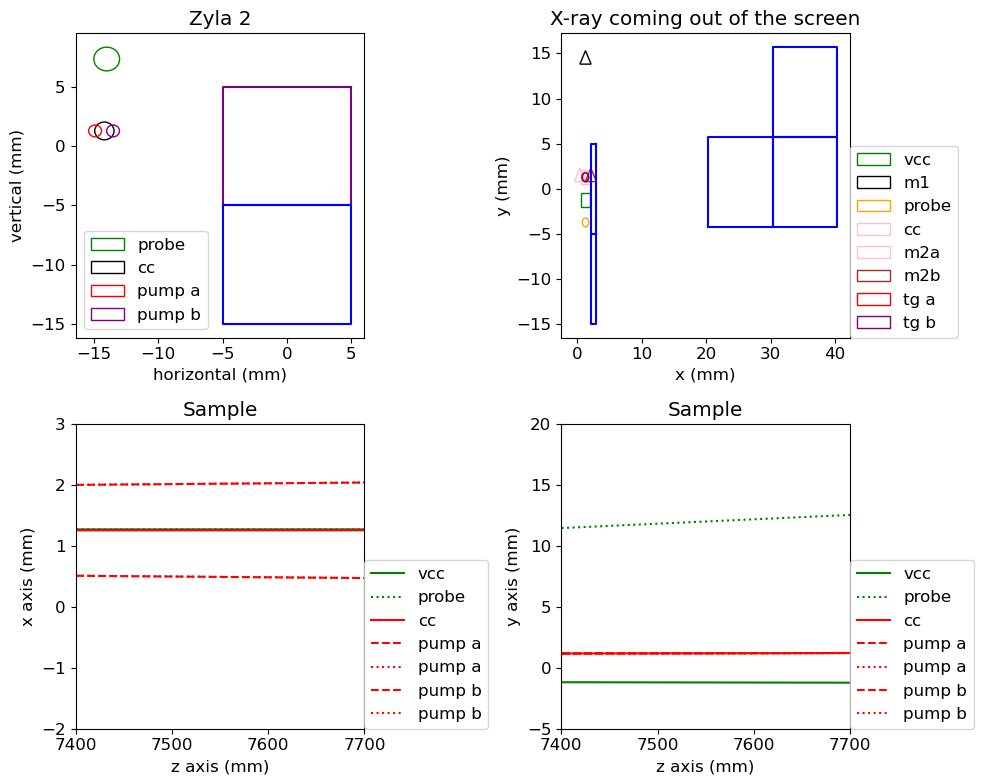

In [37]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [38]:
x.sample.z_umvr(-1)

Motor moved from 11565.5671 um to to 11564.5671 um


In [39]:
x.sample.z_umv(11565.5671)

Motor moved from 11564.5671 um to to 11565.5671 um


201000000000.0

In [40]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([6065.43230766,   15.84461498,  181.10477796])

### It seems that by ajusting the position of the sample stage motors, one cannot achieve good quality overlap

In [41]:
x.sample.z_umv(11565.5671)
x.sample.x_umv(21650.9636)

Motor moved from 11565.5671 um to to 11565.5671 um
Motor moved from 22802.9636 um to to 21650.9636 um


576000000000.0

In [42]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([339.22160893,  15.86157317, 181.29861092])

In [43]:
x.si.y_umvr(-1)

Motor moved from -1262.8492 um to to -1263.8492 um


In [44]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([337.0979893 ,  15.86157441, 181.29862516])

In [45]:
x.si.roll.user_get_position()

0.0

In [46]:
x.si.roll.control_limits

array([-0.08726646,  0.08726646])

In [47]:
x.si.roll_umv(np.deg2rad(0.0))

Motor moved from 0.00000 to 0.00000 degree


0.0

In [48]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([338.01892719,  15.66792453, 179.0851969 ])

In [49]:
x.sample.x_umvr(1)

Motor moved from 21650.9636 um to to 21651.9636 um


In [50]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([339.1721734 ,  15.6679389 , 179.08536115])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


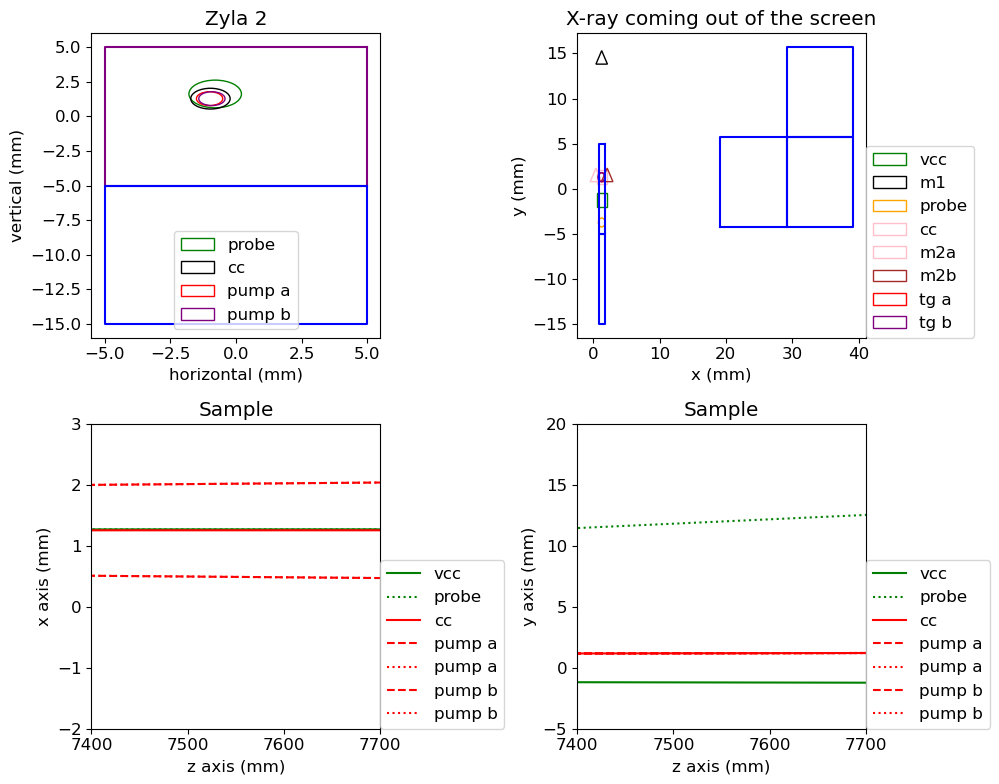

In [51]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

# Step 6: Find the delay time

In [52]:
pathLenght = x.get_arrival_time()

In [53]:
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

0.030409397646201642
-14802.131261364902


# Step 7: Calculate the Ewarld sphere and Q space coverage during rotation

In [54]:
10 / np.arcsin(np.deg2rad(5))

114.44579986172813

In [55]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['pump b']

array([-1.11272152e-02, -7.69580112e+00, -8.79634094e+01])

In [56]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['cc']

array([-3.96659292e-03, -2.89762699e+00, -3.31200280e+01])

In [57]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump b'] - beam_path_sample['cc']

array([7.16062227e-03, 4.79817414e+00, 5.48433814e+01])

In [58]:
x.m2a.x_umvr(-1)

Motor moved from 4104.3289 um to to 4103.3289 um


In [59]:
x.m2a.x_umvr(1)

Motor moved from 4103.3289 um to to 4104.3289 um


In [60]:
beam_path_sample = x.get_beam_position_on_sample_yag()
print(beam_path_sample['pump a'] - beam_path_sample['cc'])
print(beam_path_sample['pump b'] - beam_path_sample['cc'])

[-5.39303928e-03 -3.88387716e+00 -4.43929191e+01]
[7.16062227e-03 4.79817414e+00 5.48433814e+01]


In [61]:
pathLenght = x.get_path_length()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c / 1000)

AttributeError: 'XppController_TG' object has no attribute 'get_path_length'

In [ ]:
(beam_path_sample['pump a'] - beam_path_sample['pump b']) / util.c

In [ ]:
1 / np.tan(np.deg2rad(5)) / util.c